#### <b>Load Required Libraries</b>

In [1]:
# load required PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

#### <b>Image Visualization</b>

In [3]:
# load an image visualization library
import matplotlib.pyplot as plt
import PIL

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

In [4]:
# show torch.Tensor image
def imshow(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0) # [1, H, W]
    image = transforms.ToPILImage()(image)
    # show an image whose values are between [0, 1]
    plt.imshow(image)
    plt.show()

#### <b>Load Pre-trained Classification Model</b>

In [5]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EaLEiaWty0VKnJlfSHZwmkoBRMKuKa99rtR1j0m26l8MjA?download=1 -O mnist_model.pth

--2021-03-10 08:27:55--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EaLEiaWty0VKnJlfSHZwmkoBRMKuKa99rtR1j0m26l8MjA?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/CSED703G_LeNet_MNIST.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FYUxFaWFXdHkwVktuSmxmU0had21rb0JSTUt1S2E5OXJ0UjFqMG0yNmw4TWpBP3J0aW1lPUYwMEthSjdqMkVn [following]
--2021-03-10 08:27:56--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/CSED703G_LeNet_MNIST.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FYUxFaWFXdHkwVktuSmxmU0h

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(50 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), (2, 2))
        x = F.max_pool2d(self.conv2(x), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [7]:
model = LeNet()
model = model.to(device)
checkpoint = torch.load('./mnist_model.pth')
model.load_state_dict(checkpoint['net'])

<All keys matched successfully>

#### <b>Load Test Dataset</b>

In [8]:
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [14]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=2)

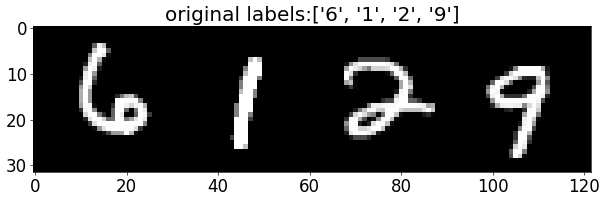

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 6 (6)
Image #2: 1 (1)
Image #3: 2 (2)
Image #4: 9 (9)


In [15]:
import numpy as np


def imshow_batch(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()


# load a batch of validation image
iterator = iter(test_dataloader)

# visualize a batch of validation image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow_batch(out, title='original labels:' + str([class_names[x] for x in classes[:4]]))

print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
for i, label in enumerate(classes[:4]):
    print(f'Image #{i + 1}: {class_names[label]} ({label})')

#### <b>Test Phase</b>

[Prediction Result Examples]


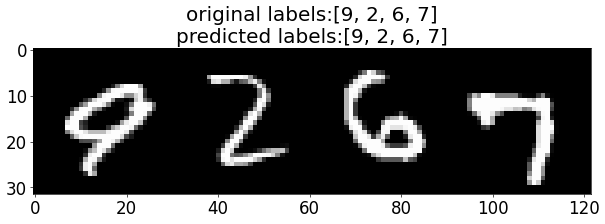

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 2 (2)
Image #1: 6 (6)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 2 (2)
Image #1: 6 (6)
Image #1: 7 (7)


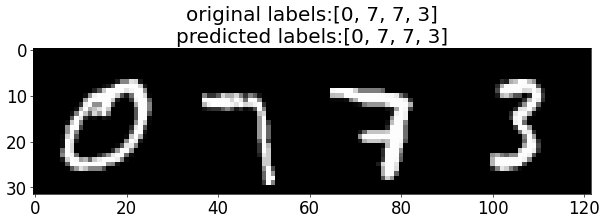

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 7 (7)
Image #1: 7 (7)
Image #1: 3 (3)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 7 (7)
Image #1: 7 (7)
Image #1: 3 (3)
[Validation] Loss: 0.0005 Accuracy: 98.9900% Time elapsed: 1.7678s (total 10000 images)


In [16]:
import time

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for i, (inputs, labels) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i == 0:
            print('[Prediction Result Examples]')
            images = torchvision.utils.make_grid(inputs[:4])
            imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                         '\npredicted labels:' + str([int(x) for x in preds[:4]]))
            print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(labels[:4]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(preds[:4]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            images = torchvision.utils.make_grid(inputs[4:8])
            imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                         '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
            print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(labels[4:8]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(preds[4:8]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')

    epoch_loss = running_loss / len(test_dataset)
    epoch_acc = running_corrects / len(test_dataset) * 100.
    print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

#### <b>Prepare Adversarial Attack Libraries</b>

In [17]:
!pip install foolbox
!pip install advertorch

In [18]:
def get_distance(a, b):
    l0 = torch.norm((a - b).view(a.shape[0], -1), p=0, dim=1)
    l2 = torch.norm((a - b).view(a.shape[0], -1), p=2, dim=1)
    mse = (a - b).view(a.shape[0], -1).pow(2).mean(1)
    linf = torch.norm((a - b).view(a.shape[0], -1), p=float('inf'), dim=1)
    return l0, l2, mse, linf

#### <b>Adversarial Attack Example 1</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 1 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


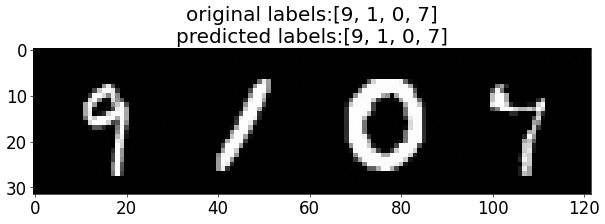

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 1 (1)
Image #1: 0 (0)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 1 (1)
Image #1: 0 (0)
Image #1: 7 (7)


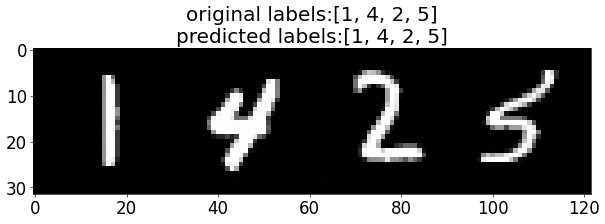

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 5 (5)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 5 (5)
[Step #0] Loss: 0.0000 Accuracy: 100.0000% Time elapsed: 0.5078s (total 64 images)
[Step #10] Loss: 0.0007 Accuracy: 98.7216% Time elapsed: 0.8603s (total 704 images)
[Step #20] Loss: 0.0006 Accuracy: 98.6607% Time elapsed: 1.1376s (total 1344 images)
[Step #30] Loss: 0.0006 Accuracy: 98.7903% Time elapsed: 1.3948s (total 1984 images)
[Step #40] Loss: 0.0006 Accuracy: 98.7424% Time elapsed: 1.6681s (total 2624 images)
[Step #50] Loss: 0.0006 Accuracy: 98.6826% Time elapsed: 1.9296s (total 3264 images)
[Step #60] Loss: 0.0007 Accuracy: 98.6936% Time elapsed: 2.2246s (total 3904 images)
[Step #70] Loss: 0.0007 Accuracy: 98.6796% Time elapsed: 2.5065s (total 4544 images)
[Step #80] Loss: 0.0007 Accuracy: 98.6690% Time elapsed: 2.7884s (total 5184 images)
[Step #90] Loss: 0.0007 A

In [19]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=1/255, nb_iter=7, eps_iter=1/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 2</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 2 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


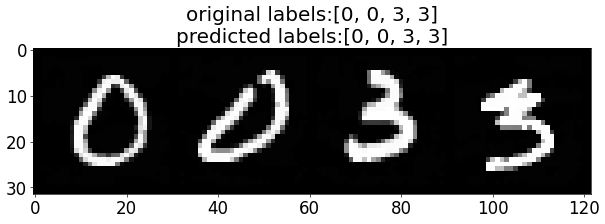

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 0 (0)
Image #1: 3 (3)
Image #1: 3 (3)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 0 (0)
Image #1: 3 (3)
Image #1: 3 (3)


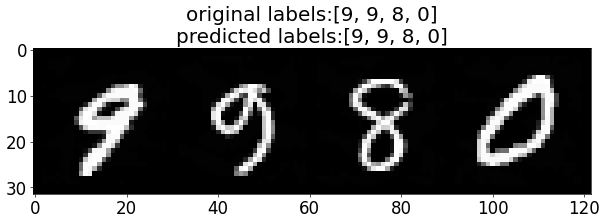

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 9 (9)
Image #1: 8 (8)
Image #1: 0 (0)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 9 (9)
Image #1: 8 (8)
Image #1: 0 (0)
[Step #0] Loss: 0.0000 Accuracy: 100.0000% Time elapsed: 0.5291s (total 64 images)
[Step #10] Loss: 0.0007 Accuracy: 98.4375% Time elapsed: 0.8233s (total 704 images)
[Step #20] Loss: 0.0007 Accuracy: 98.4375% Time elapsed: 1.1096s (total 1344 images)
[Step #30] Loss: 0.0007 Accuracy: 98.4375% Time elapsed: 1.3901s (total 1984 images)
[Step #40] Loss: 0.0007 Accuracy: 98.6280% Time elapsed: 1.6824s (total 2624 images)
[Step #50] Loss: 0.0006 Accuracy: 98.6520% Time elapsed: 1.9640s (total 3264 images)
[Step #60] Loss: 0.0007 Accuracy: 98.5912% Time elapsed: 2.2421s (total 3904 images)
[Step #70] Loss: 0.0007 Accuracy: 98.5915% Time elapsed: 2.5542s (total 4544 images)
[Step #80] Loss: 0.0007 Accuracy: 98.6497% Time elapsed: 2.8464s (total 5184 images)
[Step #90] Loss: 0.0007 A

In [20]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=2/255, nb_iter=7, eps_iter=2/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 3</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 4 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


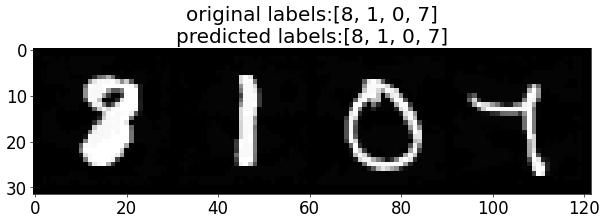

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 1 (1)
Image #1: 0 (0)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 1 (1)
Image #1: 0 (0)
Image #1: 7 (7)


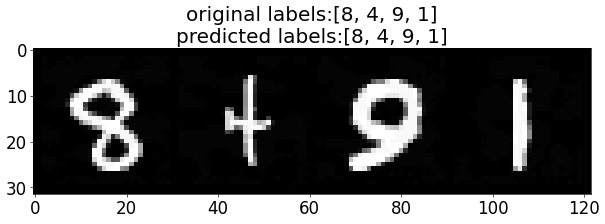

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 4 (4)
Image #1: 9 (9)
Image #1: 1 (1)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 4 (4)
Image #1: 9 (9)
Image #1: 1 (1)
[Step #0] Loss: 0.0002 Accuracy: 100.0000% Time elapsed: 0.5689s (total 64 images)
[Step #10] Loss: 0.0010 Accuracy: 97.5852% Time elapsed: 0.8640s (total 704 images)
[Step #20] Loss: 0.0010 Accuracy: 97.9911% Time elapsed: 1.1474s (total 1344 images)
[Step #30] Loss: 0.0010 Accuracy: 97.9335% Time elapsed: 1.4259s (total 1984 images)
[Step #40] Loss: 0.0011 Accuracy: 97.8277% Time elapsed: 1.7168s (total 2624 images)
[Step #50] Loss: 0.0010 Accuracy: 98.1311% Time elapsed: 1.9828s (total 3264 images)
[Step #60] Loss: 0.0010 Accuracy: 98.0277% Time elapsed: 2.2438s (total 3904 images)
[Step #70] Loss: 0.0010 Accuracy: 98.0854% Time elapsed: 2.5131s (total 4544 images)
[Step #80] Loss: 0.0009 Accuracy: 98.1096% Time elapsed: 2.8006s (total 5184 images)
[Step #90] Loss: 0.0009 A

In [21]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=4/255, nb_iter=7, eps_iter=4/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 4</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 8 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


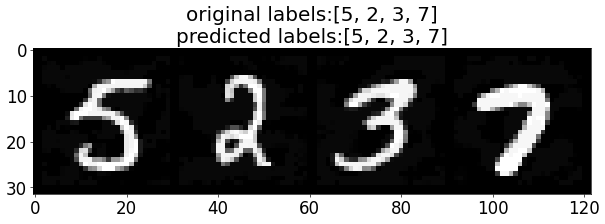

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 2 (2)
Image #1: 3 (3)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 2 (2)
Image #1: 3 (3)
Image #1: 7 (7)


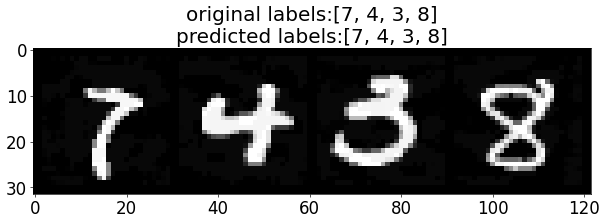

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 7 (7)
Image #1: 4 (4)
Image #1: 3 (3)
Image #1: 8 (8)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 7 (7)
Image #1: 4 (4)
Image #1: 3 (3)
Image #1: 8 (8)
[Step #0] Loss: 0.0007 Accuracy: 98.4375% Time elapsed: 0.5026s (total 64 images)
[Step #10] Loss: 0.0015 Accuracy: 97.1591% Time elapsed: 0.7894s (total 704 images)
[Step #20] Loss: 0.0015 Accuracy: 96.9494% Time elapsed: 1.0569s (total 1344 images)
[Step #30] Loss: 0.0015 Accuracy: 96.7742% Time elapsed: 1.3315s (total 1984 images)
[Step #40] Loss: 0.0015 Accuracy: 96.7226% Time elapsed: 1.6214s (total 2624 images)
[Step #50] Loss: 0.0015 Accuracy: 96.8750% Time elapsed: 1.8958s (total 3264 images)
[Step #60] Loss: 0.0015 Accuracy: 96.7213% Time elapsed: 2.1728s (total 3904 images)
[Step #70] Loss: 0.0015 Accuracy: 96.7650% Time elapsed: 2.4405s (total 4544 images)
[Step #80] Loss: 0.0015 Accuracy: 96.8943% Time elapsed: 2.7191s (total 5184 images)
[Step #90] Loss: 0.0016 Ac

In [22]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=8/255, nb_iter=7, eps_iter=8/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 5</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 16 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


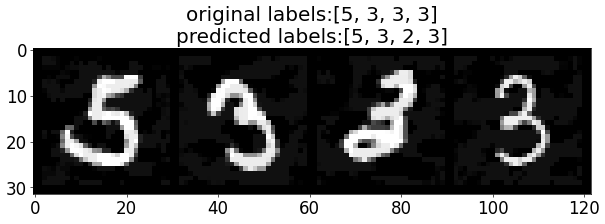

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 3 (3)
Image #1: 3 (3)
Image #1: 3 (3)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 3 (3)
Image #1: 2 (2)
Image #1: 3 (3)


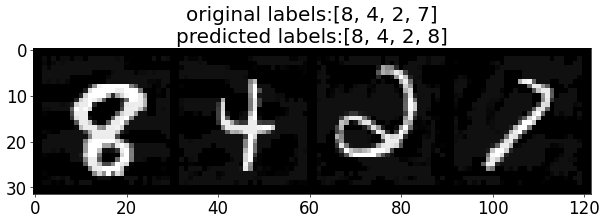

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 8 (8)
[Step #0] Loss: 0.0042 Accuracy: 90.6250% Time elapsed: 0.5020s (total 64 images)
[Step #10] Loss: 0.0058 Accuracy: 89.0625% Time elapsed: 0.7991s (total 704 images)
[Step #20] Loss: 0.0053 Accuracy: 90.1786% Time elapsed: 1.0638s (total 1344 images)
[Step #30] Loss: 0.0057 Accuracy: 89.8185% Time elapsed: 1.3254s (total 1984 images)
[Step #40] Loss: 0.0054 Accuracy: 90.1296% Time elapsed: 1.6092s (total 2624 images)
[Step #50] Loss: 0.0052 Accuracy: 90.1348% Time elapsed: 1.9021s (total 3264 images)
[Step #60] Loss: 0.0051 Accuracy: 90.3689% Time elapsed: 2.1822s (total 3904 images)
[Step #70] Loss: 0.0051 Accuracy: 90.4710% Time elapsed: 2.4417s (total 4544 images)
[Step #80] Loss: 0.0050 Accuracy: 90.5671% Time elapsed: 2.7106s (total 5184 images)
[Step #90] Loss: 0.0049 Ac

In [23]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=16/255, nb_iter=7, eps_iter=16/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 6</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 32 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


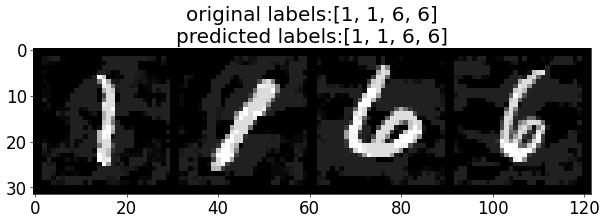

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 1 (1)
Image #1: 6 (6)
Image #1: 6 (6)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 1 (1)
Image #1: 6 (6)
Image #1: 6 (6)


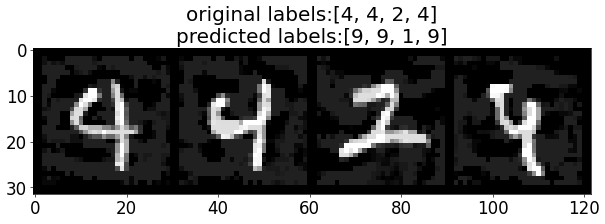

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 4 (4)
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 4 (4)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 9 (9)
Image #1: 1 (1)
Image #1: 9 (9)
[Step #0] Loss: 0.0349 Accuracy: 45.3125% Time elapsed: 0.5743s (total 64 images)
[Step #10] Loss: 0.0327 Accuracy: 43.8920% Time elapsed: 0.8518s (total 704 images)
[Step #20] Loss: 0.0324 Accuracy: 44.8661% Time elapsed: 1.1400s (total 1344 images)
[Step #30] Loss: 0.0305 Accuracy: 47.8327% Time elapsed: 1.4071s (total 1984 images)
[Step #40] Loss: 0.0307 Accuracy: 46.5701% Time elapsed: 1.6778s (total 2624 images)
[Step #50] Loss: 0.0307 Accuracy: 46.4154% Time elapsed: 1.9483s (total 3264 images)
[Step #60] Loss: 0.0307 Accuracy: 45.8504% Time elapsed: 2.2162s (total 3904 images)
[Step #70] Loss: 0.0309 Accuracy: 46.2808% Time elapsed: 2.5040s (total 4544 images)
[Step #80] Loss: 0.0310 Accuracy: 46.2191% Time elapsed: 2.7655s (total 5184 images)
[Step #90] Loss: 0.0310 Ac

In [24]:
import time
from advertorch.attacks import LinfPGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = LinfPGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=32/255, nb_iter=7, eps_iter=32/255/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Comparison with Foolbox</b>

* <b>Attack method</b>: 7-step Linf PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 1 / 255

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


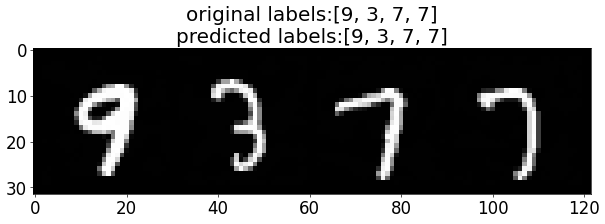

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 3 (3)
Image #1: 7 (7)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 3 (3)
Image #1: 7 (7)
Image #1: 7 (7)


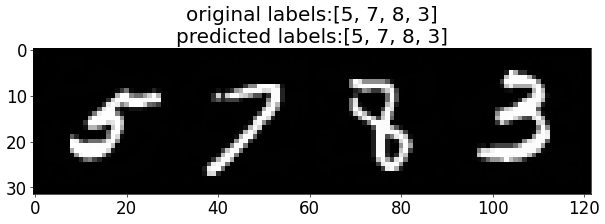

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 7 (7)
Image #1: 8 (8)
Image #1: 3 (3)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 7 (7)
Image #1: 8 (8)
Image #1: 3 (3)
[Step #0] Loss: 0.0016 Accuracy: 96.8750% Time elapsed: 0.5351s (total 64 images)
[Step #10] Loss: 0.0005 Accuracy: 98.7216% Time elapsed: 0.8715s (total 704 images)
[Step #20] Loss: 0.0005 Accuracy: 98.9583% Time elapsed: 1.1661s (total 1344 images)
[Step #30] Loss: 0.0005 Accuracy: 98.9919% Time elapsed: 1.4657s (total 1984 images)
[Step #40] Loss: 0.0005 Accuracy: 99.0472% Time elapsed: 1.7622s (total 2624 images)
[Step #50] Loss: 0.0005 Accuracy: 99.0502% Time elapsed: 2.0548s (total 3264 images)
[Step #60] Loss: 0.0005 Accuracy: 98.9754% Time elapsed: 2.3327s (total 3904 images)
[Step #70] Loss: 0.0005 Accuracy: 98.9657% Time elapsed: 2.6246s (total 4544 images)
[Step #80] Loss: 0.0006 Accuracy: 98.8619% Time elapsed: 2.9102s (total 5184 images)
[Step #90] Loss: 0.0006 Ac

In [25]:
import time
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.LinfProjectedGradientDescentAttack(abs_stepsize=1/255/4, steps=7)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    _, adv_untargeted, _ = attack(fmodel, inputs, labels, epsilons=1/255) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))